# pytorch 搭建神经网络的基本语法

## 神经网络

![神经网络](./1.png)

 下面给出一些简单的记号：

 $\bullet$ $n_l$：表示神经网络的层数，本例中$n_l=3$。

 $\bullet$ $s_l$：表示第$l$层的单元数量(不包括偏置单元)。

 $\bullet$ $W^{(l)}$：表示第$l$层到$l+1$层的权重矩阵，其中$W^{(l)}_{ij}$是第$l$层第$j$单元到$l+1$层
 第$i$单元之间的权重(注意$ij$代表的意思)。本例中$W^{(1)} \in \mathfrak{R}^{3\times 3}$。

 $\bullet$ $b^{(l)}$：表示第$l+1$层的偏置，其中$b^{(l)}_i$第$l+1$层的第$i$单元的偏置项。

 $\bullet$ $a^{(l)}$：表示第$l$层的\emph{激活值}(输出值)，其中$a^{(l)}_i$表示第$l$层第$i$单元的激活值。

 $\bullet$ $z^{(l)}$:表示第$l$层的每个单元的输入加权和，其中$z^{(l)}_i$表示第$l$层第$i$单元的输入加权值。

 所以本例中，
 $$a^{(2)}_1 = f(W^{(1)}_{11}x_1+W^{(1)}_{12}x_2+W^{(1)}_{13}x_3+b^{(1)}_1)$$
 $$z^{(2)}_1 = W^{(1)}_{11}x_1+W^{(1)}_{12}x_2+W^{(1)}_{13}x_3+b^{(1)}_1$$
 $$a^{(2)}_1 = f(z^{(2)}_1)$$
 同理，
 $$z^{(2)}_2 = W^{(1)}_{21}x_1+W^{(1)}_{22}x_2+W^{(1)}_{23}x_3+b^{(1)}_2$$
 $$a^{(2)}_2 = f(z^{(2)}_2)$$
 $$z^{(2)}_3 = W^{(1)}_{31}x_1+W^{(1)}_{32}x_2+W^{(1)}_{33}x_3+b^{(1)}_2$$
 $$a^{(2)}_3 = f(z^{(2)}_3)$$
 $$h_{W,b}(x) = a^{(3)} = f(z^{(3)})=f(W^{(2)}_{11}a^{(2)}_1+W^{(2)}_{12}a^{(2)}_2+
 W^{(2)}_{13}a^{(2)}_3+b^{(2)}_1)$$


 那么，现在假设我们有一包含m个样本的样本集${(x^{(1)},y^{(1)}),...,(x^{(m)},y^{(m)})}$，对于单个样本$(x,y)$,
   我们定义其\emph{损失函数}：
    $$J(W,b;x,y) = \frac{1}{2}\| h_{W,b}(x)-y\|^2$$
 那么对于整个样本集，定义其损失函数为：
    $$J(W,b) = \sum_{i=1}^{m}J(W,b;x,y)$$
 自然而然，我们希望能找到一组$(W,b)$使得对于整个样本集来说，其误差和最小，因此，我们就有了一个优化问题，
 其目标函数就是误差和式子，而目标是使得误差和最小。

为了解决这一优化问题，我们准备采取梯度下降法又称最速下降法。
   梯度下降法其实是线搜索的一个特定搜索方向。线搜索框架为：
   $$x_{k+1}=x_{k}+\alpha_k p_k$$
   其中$\alpha_k$被称为步长,在机器学习中通常被称为学习率。

   梯度下降法就是选择$p_k = -\nabla f_k$，所以其基本式子为：
   $$x_{k+1}=x_{k}-\alpha_k \nabla f_k$$
   而在神经网络问题中，通常我们固定步长$\alpha_k =\alpha$，所以其式子为：
   $$x_{k+1}=x_{k}-\alpha \nabla f_k$$

   下面我们使用梯度下降法来解决本节最开始提出的问题，我们的目标是得到参数组$(W,b)$使得$J(W,b)$最小，
   所以要对参数W,b进行更新：
   $$W_{ij}^{(l)} = W_{ij}^{(l)} - \alpha \frac{\partial J(W,b)}{\partial  W_{ij}^{(l)}}$$
   $$b_i^{(l)} = b_i^{(l)}- \alpha \frac{\partial J(W,b)}{\partial  b_i^{(l)}}$$

   从上式不难看出，我们的重点是要计算偏导数，而我们将使用反向传播算法来进行计算。


## 构建网络基本语法

### 数据准备 

当面对小数据量的情况，我们可以手动加载数据;但当数据量大的时候，利用Pytorch自带的API,通常会利用Dataset和DataLoader,其中Dataset是一个包装类，用来将数据包装为Dataset类，然后传入DataLoader中，我们再使用DataLoader这个类来更加快捷的对数据进行操作。

In [ ]:
# 这是Dataset类每当我们自定义类MyDataset必须要继承它并实现其两个成员函数：__getitem__,__add__
class Dataset(object):
    r"""An abstract class representing a :class:`Dataset`.

    All datasets that represent a map from keys to data samples should subclass
    it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
    data sample for a given key. Subclasses could also optionally overwrite
    :meth:`__len__`, which is expected to return the size of the dataset by many
    :class:`~torch.utils.data.Sampler` implementations and the default options
    of :class:`~torch.utils.data.DataLoader`.

    .. note::
      :class:`~torch.utils.data.DataLoader` by default constructs a index
      sampler that yields integral indices.  To make it work with a map-style
      dataset with non-integral indices/keys, a custom sampler must be provided.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])
    
    # No `def __len__(self)` default?
    # See NOTE [ Lack of Default `__len__` in Python Abstract Base Classes ]
    # in pytorch/torch/utils/data/sampler.py

### 搭建网络

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, in_dim, n_hidden, out_dim):
        super(Net, self).__init__()
        # 线性函数
        self.fc1 = nn.Linear(in_dim, n_hidden)
        self.fc2 = nn.Linear(n_hidden, out_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net(1,10,10)
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
)


神经网络中常用的层

| 类型 | 名称 | 函数 | 
| ---- | ---- | ---- |
| Conv | 卷积层 | torch.nn.Conv1d; torch.nn.Conv2d, torch.nn.Conv3d |
| ReLU | 激活层 | torch.nn.functional.relu; torch.nn.relu  |
| Pool | 池化层 | torch.nn.MaxPool1d/2d/3d; torch.nn.AvgPool1d/2d/3d |
| Linear | 全连接层 | torch.nn.Linear |
| ConvTranspose | 反卷积 | torch.nn.ConvTranspose1d; torch.nn.ConvTranspose2d, torch.nn.ConvTranspose3d |

### 构建损失函数

In [3]:
net = Net(1,10,10)
in_ = torch.randn(1)
output = net(in_)
target = torch.randn(10)

criterion = nn.MSELoss() # 均方误差损失 
loss = loss = criterion(output, target) # target为标签 
print(loss)

tensor(0.9420, grad_fn=<MseLossBackward>)


常用的损失函数

In [ ]:
torch.nn.L1Loss() # L1范数损失,计算 output 和 target 之差的绝对值

In [7]:
torch.nn.CrossEntropyLoss() # 交叉熵损失函数

CrossEntropyLoss()

$ H(p,q) = - \sum_{i=1}^{n}p(x_i)log(q(x_i))$

### 优化算法

In [16]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练循环中
optimizer.zero_grad()   # 梯度置零
output = net(in_)
loss = criterion(output, target)

print(net.fc1.weight)

loss.backward()
optimizer.step()    # 更新梯度
print(net.fc1.weight)
loss = criterion(output, target)

Parameter containing:
tensor([[-0.0238],
        [ 0.7938],
        [ 0.0437],
        [ 0.5428],
        [ 0.5014],
        [ 0.8341],
        [-0.8823],
        [-0.6518],
        [ 0.6019],
        [ 0.4694]], requires_grad=True)
Parameter containing:
tensor([[-0.0238],
        [ 0.7942],
        [ 0.0437],
        [ 0.5428],
        [ 0.5017],
        [ 0.8340],
        [-0.8823],
        [-0.6518],
        [ 0.6019],
        [ 0.4694]], requires_grad=True)


其他优化算法：Adagrad，RMSProp,Adam

Adam算法：
$$m_t = \mu * m_{t-1} + (1-\mu)*g_t \\
n_t = \nu * n_{t-1} + (1-\nu)*g_t^2 \\
\hat{m}_t = \frac{m_t}{1-\mu^t} \\
\hat{n}_t = \frac{n_t}{1-\nu^t} \\
\Delta \theta_t = -\frac{\hat{m}_t}{\sqrt{\hat{n}_t} + \epsilon} * \eta$$

## MNIST 实例

MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST). 训练集 (training set)为60000张28*28的灰度图，由来自 250 个不同人手写的数字构成, 其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员. 测试集(test set)为10000张28*28的灰度图。

首先我们来看一下可视化以后的效果

torch.Size([60000, 28, 28])
torch.Size([60000])
0


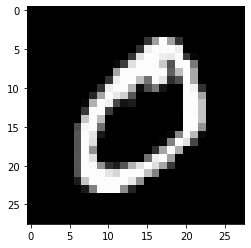

In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

train_data = datasets.MNIST(
    root='./mnist',
    train=True,
    # 将一张图片或numpy数组转成 (C x H x W)torch.FloatTensor 并归一化[0.0,0.1]
    transform=transforms.ToTensor(),
)

print(train_data.train_data.size())    # (60000, 28, 28)
print(train_data.train_labels.size())  # (60000)
plt.imshow(train_data.train_data[1].numpy(), cmap='gray')  # train_data[0]
print(train_data.train_labels[1].numpy())

接下来我们按照前面介绍的步骤来搭建网络训练神经网络

### 准备数据

In [ ]:
 transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
train_data = datasets.MNIST('./mnist', train=True,
                       transform=transform)
test_data = datasets.MNIST('./mnist', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

### 搭建网络

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class Net(nn.Module):
    def __init__(self, in_dim, n_hidden, out_dim):
        super(Net, self).__init__()
        # 线性函数
        self.fc1 = nn.Linear(in_dim, n_hidden)
        self.fc2 = nn.Linear(n_hidden, out_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

### 损失函数

In [ ]:
data = data.view(data.size(0), -1)
output = model(data)
loss = F.nll_loss(output, target)

### 优化算法

In [3]:
optimizer = optim.SGD(model.parameters(), lr=lr)

NameError: name 'optim' is not defined

### 完整代码

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


class Net(nn.Module):
    def __init__(self, in_dim, n_hidden, out_dim):
        super(Net, self).__init__()
        # 线性函数
        self.fc1 = nn.Linear(in_dim, n_hidden)
        self.fc2 = nn.Linear(n_hidden, out_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        data = data.view(data.size(0), -1)
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

def main():
    # 训练参数
    batch_size = 60
    test_batch_size = 1000
    epochs = 1
    lr = 0.1
    device = torch.device("cpu")
    save_path = './mnist.pt' 
    
    
    in_dim = 28*28
    n_hidden = 10
    out_dim = 10
    
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_data = datasets.MNIST('./mnist', train=True,
                       transform=transform)
    test_data = datasets.MNIST('./mnist', train=False,
                       transform=transform)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batch_size)

    model = Net(in_dim, n_hidden, out_dim).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

    torch.save(model, save_path)
    

if __name__ == '__main__':
    main()

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,  0.2504,
           1.9305,  2.8088,  1.8541, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

KeyboardInterrupt: 

[[2]]


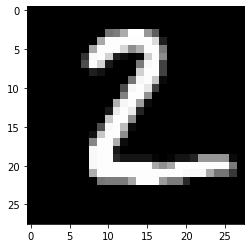

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, in_dim, n_hidden, out_dim):
        super(Net, self).__init__()
        # 线性函数
        self.fc1 = nn.Linear(in_dim, n_hidden)
        self.fc2 = nn.Linear(n_hidden, out_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    
save_path = './mnist.pt'

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
test_data = datasets.MNIST(
    root='./mnist',
    train=False,
    transform=transform,
)

plt.imshow(test_data.test_data[1].numpy(), cmap='gray')
model = torch.load(save_path)
data = test_data.test_data[1].view(1,-1)
model.eval()
output = model(data.float())

pred = output.argmax(dim=1, keepdim=True)
print(pred.numpy())